In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

## Fashion MNIST dataset

In [2]:
print(tf.__version__)

2.9.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [3]:
(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()
print(train_image.shape)
print(train_label.shape)
print(test_image.shape)
print(test_label.shape)
# 28 is gridlines, 0-255 is pixel value
# Machine reads picture pixelwise (28 rows and 28 columns)
# Grey Scale (black and white), RGB (Red, Blue, Green)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)


Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', ' Shirt',' Sneaker' ,' Bag' ,'Ankle boot' ]

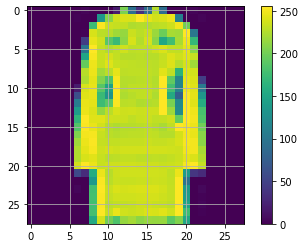

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[500])
plt.colorbar()
plt.grid(True)
plt.show()
# 0-255 colour range

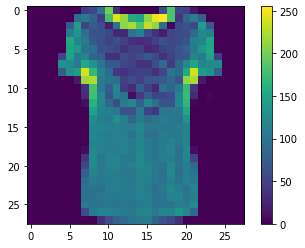

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[5001])
plt.colorbar()
plt.grid(False)
plt.show()

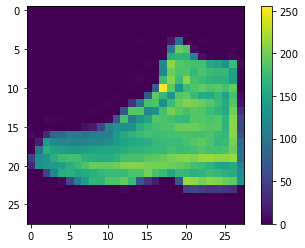

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[50000])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Mandatory Step - Data Normalization - (Min_Max approach) == Act/ 255
train_image = train_image/ 255.0
test_image = test_image/ 255.0

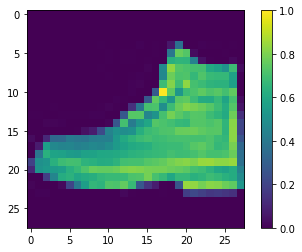

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[50000])
plt.colorbar()
plt.grid(False)
plt.show()

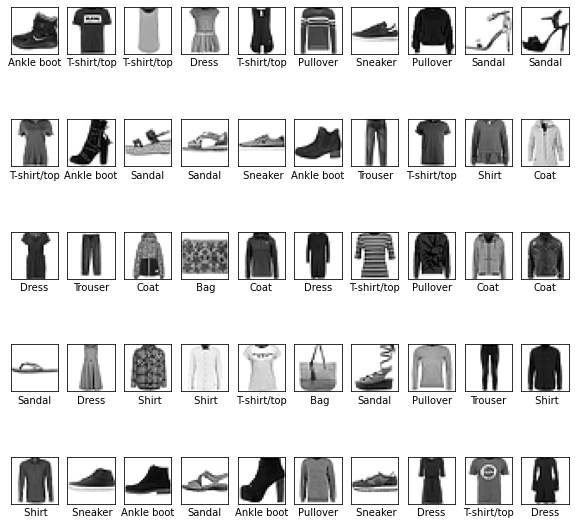

In [11]:
plt.figure(figsize = (10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_image[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()
    

## Building DNN - MLP Perceptron

In [12]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()
model = None

In [13]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape =(28,28)))
model1.add(tf.keras.layers.Dense(units =128, activation = 'softmax'))
model1.add(tf.keras.layers.Dense(units =10))

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy
              (from_logits = True), metrics = ['accuracy'])

In [32]:
model1.fit(train_image, train_label, epochs =20, validation_data=(test_image, test_label), batch_size =20)

Epoch 1/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3414 - accuracy: 0.8804 - val_loss: 0.4605 - val_accuracy: 0.8422
Epoch 2/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3401 - accuracy: 0.8801 - val_loss: 0.4534 - val_accuracy: 0.8509
Epoch 3/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3375 - accuracy: 0.8824 - val_loss: 0.4600 - val_accuracy: 0.8496
Epoch 4/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3353 - accuracy: 0.8824 - val_loss: 0.4904 - val_accuracy: 0.8427
Epoch 5/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3321 - accuracy: 0.8837 - val_loss: 0.4587 - val_accuracy: 0.8490
Epoch 6/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3299 - accuracy: 0.8839 - val_loss: 0.4598 - val_accuracy: 0.8453
Epoch 7/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3286 - accuracy: 0.8838 - val_loss: 0.4502 - val_accuracy: